# X-Ray reflection to find the spacing between planes of atoms

Author: Ethan Kao (student #: 22070552)

Date: 1st of March, 2023

Completed as coursework for PHAS0008-22/23 "Practical Skills 1P"

The aim of this notebook is to find the spacing between planes of mica (muscovite) atoms after X-Rays are reflected.

## Introduction

Bragg's Law [1] states that constructive interference occurs when the following equation is satisfied:

$$n \lambda = 2 d sin\theta$$

where $\lambda$ is the wavelength of X-rays, $d$ is the distance between planes of atoms, $\theta$ is the scattering angle, and $n$ is the order of the reflection.

In this reflection experiment, the X-rays have a wavelength $\lambda= 1.54184 \times 10^{-10} m$ [2]. After the X-rays were reflected, 8 positions of constructive interference were detected (known as Bragg peaks). We will find the scattering angle $\theta$ for the 8 Bragg peaks. These 8 data points will then be used to find the spacing between the planes of atoms $d$.

In [1]:
#imported packages for plotting
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


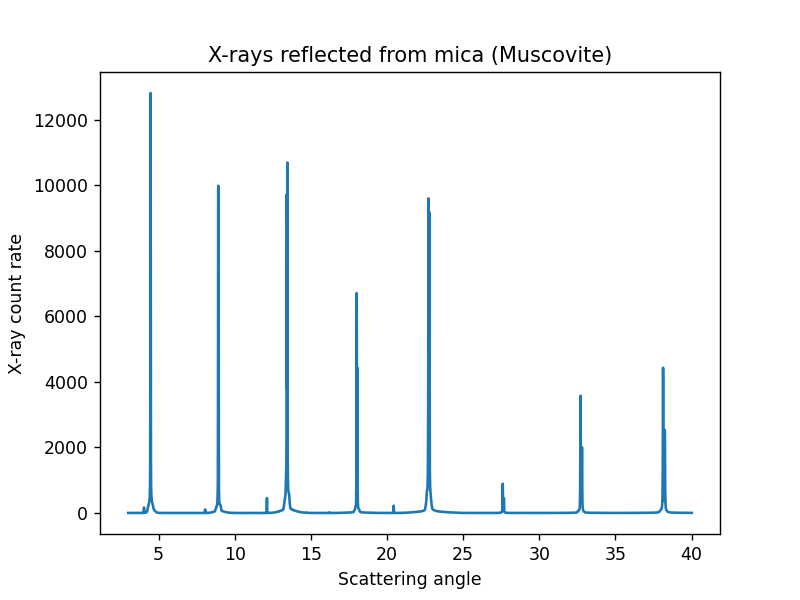

Text(0.5, 1.0, 'X-rays reflected from mica (Muscovite)')

In [2]:
#import data into 3 variables
theta,count,u_count=np.loadtxt("data.csv", delimiter=',', unpack=True)

#wavelength of x-ray [m]
wavelength =  1.54184e-10

#length of data-set
length = len(theta)

#plot raw data
plt.figure()
plt.plot(theta,count)
plt.ylabel("X-ray count rate")
plt.xlabel("Scattering angle")
plt.title("X-rays reflected from mica (Muscovite)")

## Part 1: Finding the peaks
The scattering angle with the highest count rate for each order of reflection needs to be found. From the figure above, we know that there are 8 peaks in the following scattering angle ranges:
- 3.0-5.0 degrees
- 7.5-10.0 degrees
- 12.5-15.0 degrees
- 17.5-19.0 degrees
- 21.0-24.0 degrees
- 27.0-28.0 degrees
- 31.5-33.5 degrees
- 37.5-39.0 degrees

We can now find the maximum x-ray count rate in each range and the associated scattering angle. Note that decreasing the ranges/bin size will decrease the runtime of the code below (which is very fast to begin with).

In [10]:
#set arrays
n = [1,2,3,4,5,6,7,8]
theta_max = [0,0,0,0,0,0,0,0]
count_max = [0,0,0,0,0,0,0,0]
entry_num = [0,0,0,0,0,0,0,0]

counter = 0

while counter< (length-1):
        #create temp variable with scattering angle
        theta_temp = theta[counter]
        #check if angle is within the given range
        #check if for the particle count at that angle is the biggest
        #n=1
        if 3<theta_temp and theta_temp<5 and count[counter]>count_max[0]:
            #add angle, count, and entry number to arrays
            theta_max[0] = theta_temp
            count_max[0] = count[counter]
            entry_num[0] = counter
        #n=2
        if 7.5<theta_temp and theta_temp<10 and count[counter]>count_max[1]:
            theta_max[1] = theta_temp
            count_max[1] = count[counter]
            entry_num[1] = counter
        #n=3
        if 12.5<theta_temp and theta_temp<15 and count[counter]>count_max[2]:
            theta_max[2] = theta_temp
            count_max[2] = count[counter]
            entry_num[2] = counter
        #n=4
        if 17.5<theta_temp and theta_temp<19 and count[counter]>count_max[3]:
            theta_max[3] = theta_temp
            count_max[3] = count[counter]
            entry_num[3] = counter
        #n=5
        if 21<theta_temp and theta_temp<24 and count[counter]>count_max[4]:
            theta_max[4] = theta_temp
            count_max[4] = count[counter]
            entry_num[4] = counter
        #n=6
        if 27<theta_temp and theta_temp<28 and count[counter]>count_max[5]:
            theta_max[5] = theta_temp
            count_max[5] = count[counter]
            entry_num[5] = counter
        #n=7
        if 31.5<theta_temp and theta_temp<33.5 and count[counter]>count_max[6]:
            theta_max[6] = theta_temp
            count_max[6] = count[counter]
            entry_num[6] = counter
        #n=8
        if 37.5<theta_temp and theta_temp<39 and count[counter]>count_max[7]:
            theta_max[7] = theta_temp
            count_max[7] = count[counter]
            entry_num[7] = counter
        counter += 1

print("Order: " + str(n))
print("Scattering angle: " + str(theta_max))
print("Count: " + str(count_max))

#use to find angle error later
print("Entry #: " + str(entry_num))

Order: [1, 2, 3, 4, 5, 6, 7, 8]
Scattering angle: [4.47395, 8.9195, 13.45595, 18.0025, 22.7208, 27.6008, 32.71315, 38.1286]
Count: [12820.232, 9987.938, 10697.423, 6712.938, 9603.196, 893.015, 3578.041, 4434.175]
Entry #: [146, 586, 1035, 1485, 1952, 2435, 2941, 3477]


## Part B: Finding the spacing between planes of atoms

Now that we have the angles at which the maximum count occrs for each order of reflection, we can find the space between planes of atoms $d$. We can rearrange Bragg's law to fit the equation for a straight line:

$$n  = \frac{2 d}{\lambda} sin\theta$$
$$y  = mx + c$$

We can see that the order of reflection $n$ will be on the $y$-axis. $sin\theta$ will be on the $x$-axis. The gradient $m$ will be equal to $\frac{2d}{\lambda}$. This relationship can be rearranged to give: $d = \frac{m \lambda}{2}$. The percentage uncertainty of $d$ will be equivalent to the percentage uncertainty of $m$ [3]. The y-intercept $c$ should be 0. Any deviation from 0 will suggest the presence of systematic errors. Note that both the gradient and the y-intercept have no dimensions.

A weighted least squares fit will be applied to find the gradient and y-intercept. In order to have a weighted fit, we need uncertainties for the angles. Given that the maximum scattering angle has an entry number $k$, the scattering angle could deviate between the scattering angle of entry $k-1$ and entry $k+1$. This logic will be applied to all the orders of magnitude to find $\Delta \theta$

In [15]:
#find scattering angle uncertainty
u_theta_max = []

for i in entry_num:
    #find angle difference 1 entry around the maximum angle entry
    #append angle difference to array
    u_theta_max.append(theta[i+1]-theta[i-1])

print("Uncertainty in scattering angle: " + str(np.round(u_theta_max,4)))

Uncertainty in scattering angle: [0.0202 0.0203 0.0202 0.0202 0.0203 0.0202 0.0202 0.0202]


In [11]:
#calculate weighting based on uncertainty
weight = 1/np.array(u_theta_max)
#convert scattering angle into radians
theta_rads = (np.array(theta_max)/360)*2*np.pi
#find sin(theta)
sin_theta = np.sin(theta_rads)

#creat covariance matrix based on a linear fit, weighting, sin(theta), order of reflection
params, cov = np.polyfit(sin_theta,n,1,w=weight, cov='unscaled')
#find gradient and y-intercept from matrix
m, c = params
#find uncertainty in gradient and y-intercept from matrix
dm, dc = np.sqrt(np.diag(cov))

print("gradient: " + str(m) + " +/- " + str(dm))
print("y-intercept:  " + str(c) + " +/- " + str(dm))

gradient is 12.979159718260501 +/- 0.04047058190292432
y-intercept is -0.013861187876908368 +/- 0.04047058190292432


<IPython.core.display.Javascript object>


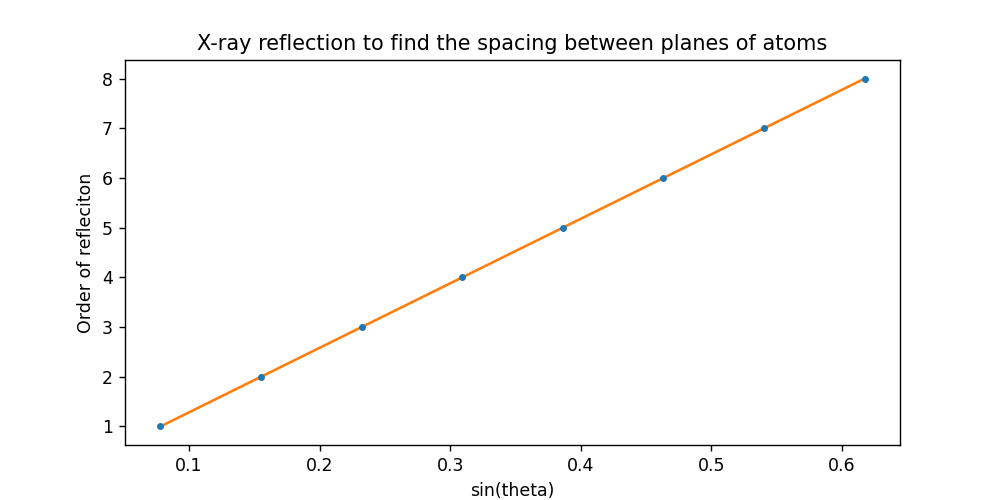

Text(0.5, 1.0, 'X-ray reflection to find the spacing between planes of atoms')

In [6]:
#plot raw data and line of best fit
plt.figure(figsize=(8, 4))
plt.errorbar(sin_theta,n,yerr=u_theta_max,fmt='.',label="Raw data")
plt.plot(sin_theta,m*sin_theta+c,'-',label="Weighted line of regression")

plt.xlabel("sin(theta)")
plt.ylabel("Order of refleciton")
plt.title("X-ray reflection to find the spacing between planes of atoms")

In [9]:
#find d based on gradient and wavelength
d = (wavelength*m)/2

#per. uncertainty of d [3]
per_d = dm/m

#abs. uncertainty of d [3]
u_d = per_d*d


print("d (raw)     = (" + str(d) + " +/- " + str(u_d) + ") m")

#round results and convert m to nm
d_display = round(d * 10e9,2)
u_d_display = round(u_d * 10e9,2)
per_d_display = round (per_d*100, 2)


print("d (rounded) = (" + str(d_display) + " +/- " + str(u_d_display) + ") nm")
print("Percentage uncertainty = " + str(per_d_display) + "%")

d (raw)     = (1.0005893810001386e-09 +/- 3.1199581000602417e-12) m
d (rounded) = (10.01 +/- 0.03) nm
Percentage uncertainty = 0.31%


## Conclusion
The distance between planes of atoms has now been found to be ($10.01 \pm 0.03$) nm. The low uncertainty illustrates the percision of this set-up. The y-intercept is non-zero (-0.014). However, it is a very small deviation and so we can conclude that systematic errors did little to affect the accuracy of the experiment.

### References
[1] "Bragg's Law," HyperPhysics. http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/bragg.html. (accessed Mar. 1, 2023).

[2] "PHAS0008 – Experimental Methods Coursework (2022-23)," University College London Department of Physics and Astronomy. (revised Feb, 2023).

[3] Szumilo, M. Llorente-Garcia, I. Jones P. Skipper N. "Data Analysis and Statistics Booklet: PHAS0007 Practical Physics and Computing 1," University College London Department of Physics and Astronomy. (revised in 2022).